In [1]:
#import importanat library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import math

from mlxtend.plotting import plot_decision_regions
import missingno as msno
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
# %matplotlib inline

C:\Users\NEELIMA\AppData\Local\Temp\ipykernel_8840\1576107679.py:6: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


In [2]:
#load dataset
df=pd.read_csv('D:\AI-Driven Insights Evaluating Machine Learning Techniques for Diabetic Disease Prediction\diabetes_dataset_5000-3.csv')

In [3]:
#first five row look of dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,116,81,17,160,16.1,0.693,74,0
1,3,174,48,31,247,16.0,1.174,45,1
2,12,193,64,48,248,36.0,0.702,53,1
3,14,82,128,39,228,42.9,1.113,40,0
4,10,169,41,17,75,41.3,0.604,78,1


In [4]:
#dataset shape
df.shape

(5000, 9)

In [5]:
#dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               5000 non-null   int64  
 1   Glucose                   5000 non-null   int64  
 2   BloodPressure             5000 non-null   int64  
 3   SkinThickness             5000 non-null   int64  
 4   Insulin                   5000 non-null   int64  
 5   BMI                       5000 non-null   float64
 6   DiabetesPedigreeFunction  5000 non-null   float64
 7   Age                       5000 non-null   int64  
 8   Outcome                   5000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 351.7 KB


In [6]:
# dataset columns list
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
# checking duplicates values
df.duplicated().sum()

0

In [8]:
# dataset discription
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,6.938400,135.451800,84.855600,32.022000,155.754200,32.504180,1.295970,48.666400,0.65560
std,4.350033,37.278117,26.077829,16.065066,81.896227,10.139797,0.708755,18.072134,0.47522
min,0.000000,70.000000,40.000000,5.000000,15.000000,15.000000,0.050000,18.000000,0.00000
25%,3.000000,103.000000,62.000000,18.000000,84.000000,23.700000,0.692750,33.000000,0.00000
50%,7.000000,136.000000,85.000000,32.000000,155.000000,32.300000,1.313000,48.500000,1.00000
75%,11.000000,168.000000,108.000000,46.000000,227.000000,41.400000,1.906000,65.000000,1.00000
max,14.000000,199.000000,129.000000,59.000000,299.000000,50.000000,2.500000,79.000000,1.00000


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,5000.0,6.93840,4.350033,0.00,3.00000,7.000,11.000,14.0
Glucose,5000.0,135.45180,37.278117,70.00,103.00000,136.000,168.000,199.0
BloodPressure,5000.0,84.85560,26.077829,40.00,62.00000,85.000,108.000,129.0
SkinThickness,5000.0,32.02200,16.065066,5.00,18.00000,32.000,46.000,59.0
Insulin,5000.0,155.75420,81.896227,15.00,84.00000,155.000,227.000,299.0
BMI,5000.0,32.50418,10.139797,15.00,23.70000,32.300,41.400,50.0
DiabetesPedigreeFunction,5000.0,1.29597,0.708755,0.05,0.69275,1.313,1.906,2.5
Age,5000.0,48.66640,18.072134,18.00,33.00000,48.500,65.000,79.0
Outcome,5000.0,0.65560,0.475220,0.00,0.00000,1.000,1.000,1.0


In [10]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
# Check null/missing value in data set
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
df['Outcome'].value_counts()

Outcome
1    3278
0    1722
Name: count, dtype: int64

In [13]:
diabetes_df = df.copy(deep = True)
diabetes_df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)


In [14]:
# Showing the Count of NANs
print(diabetes_df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


# Data Visualization

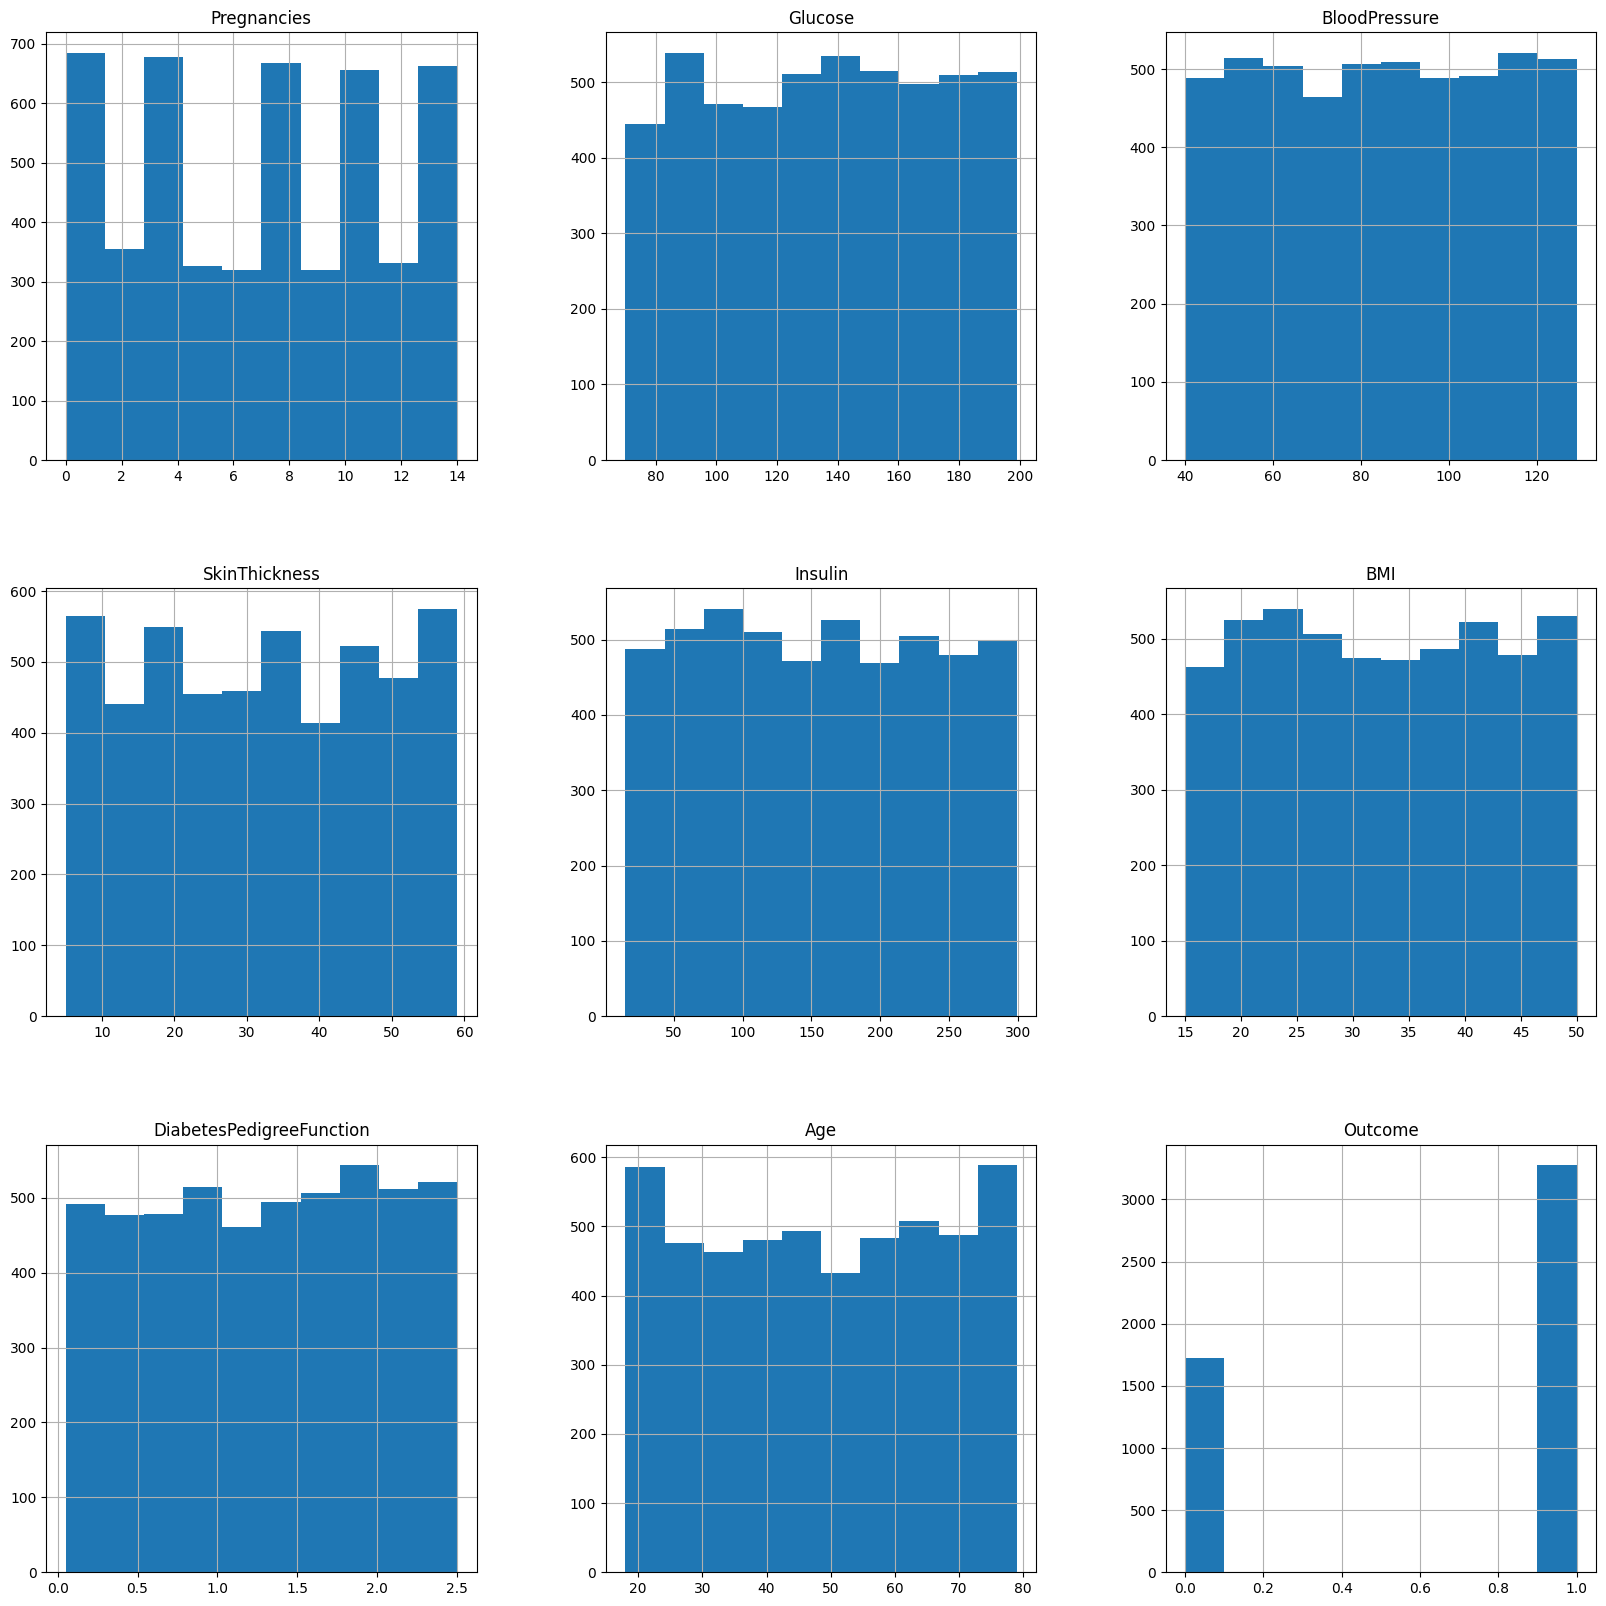

In [15]:
p = df.hist(figsize = (20,20))
plt.show()

In [16]:
diabetes_df['Glucose'].fillna(diabetes_df['Glucose'].mean(), inplace = True)
diabetes_df['BloodPressure'].fillna(diabetes_df['BloodPressure'].mean(), inplace = True)
diabetes_df['SkinThickness'].fillna(diabetes_df['SkinThickness'].median(), inplace = True)
diabetes_df['Insulin'].fillna(diabetes_df['Insulin'].median(), inplace = True)
diabetes_df['BMI'].fillna(diabetes_df['BMI'].median(), inplace = True)

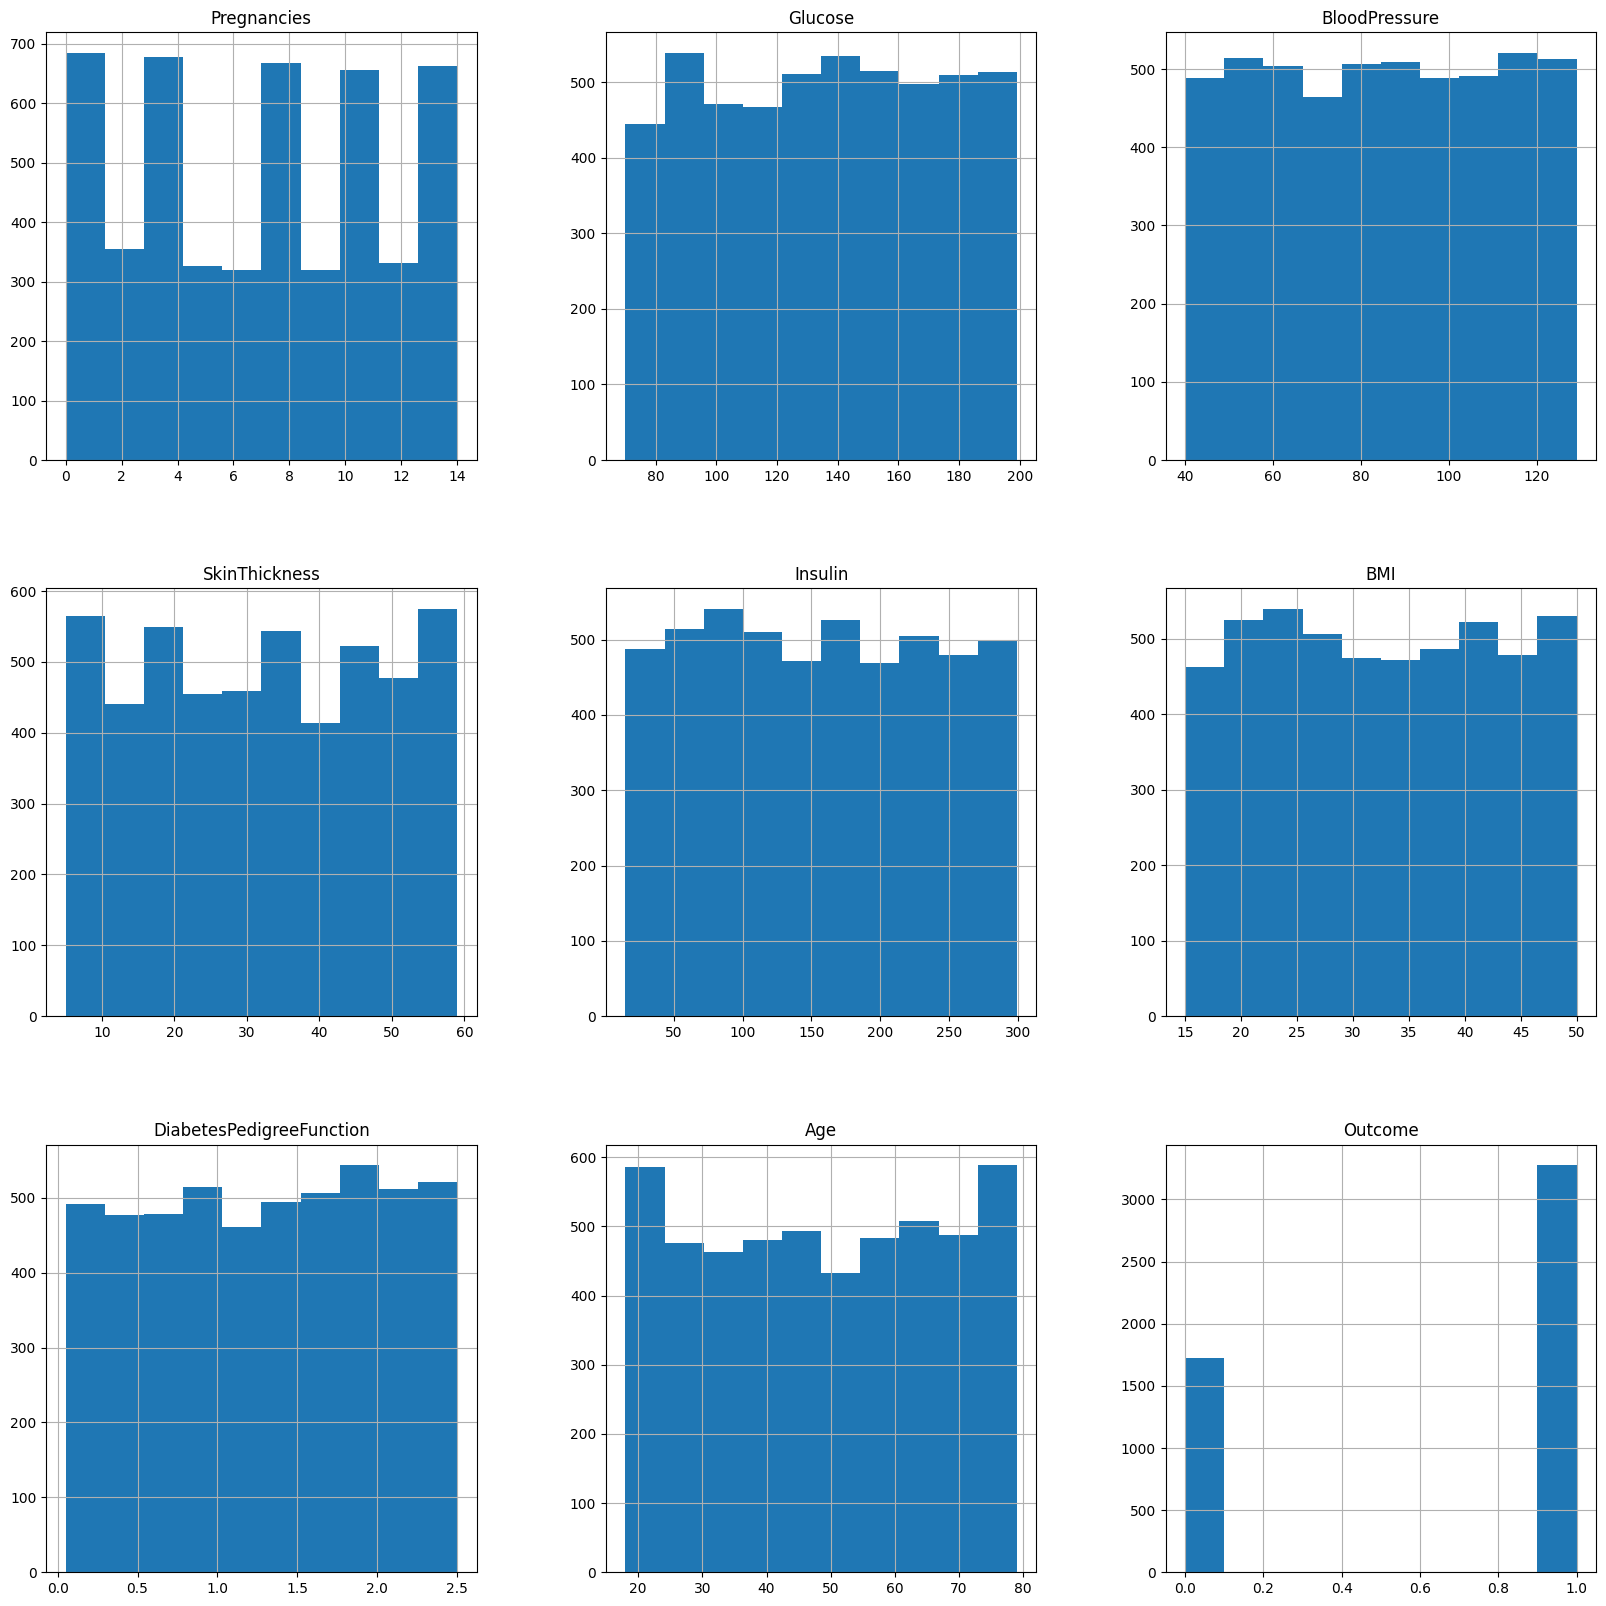

In [17]:
#Plotting the distributions after removing the NAN values.
p = diabetes_df.hist(figsize = (20,20))
plt.show()

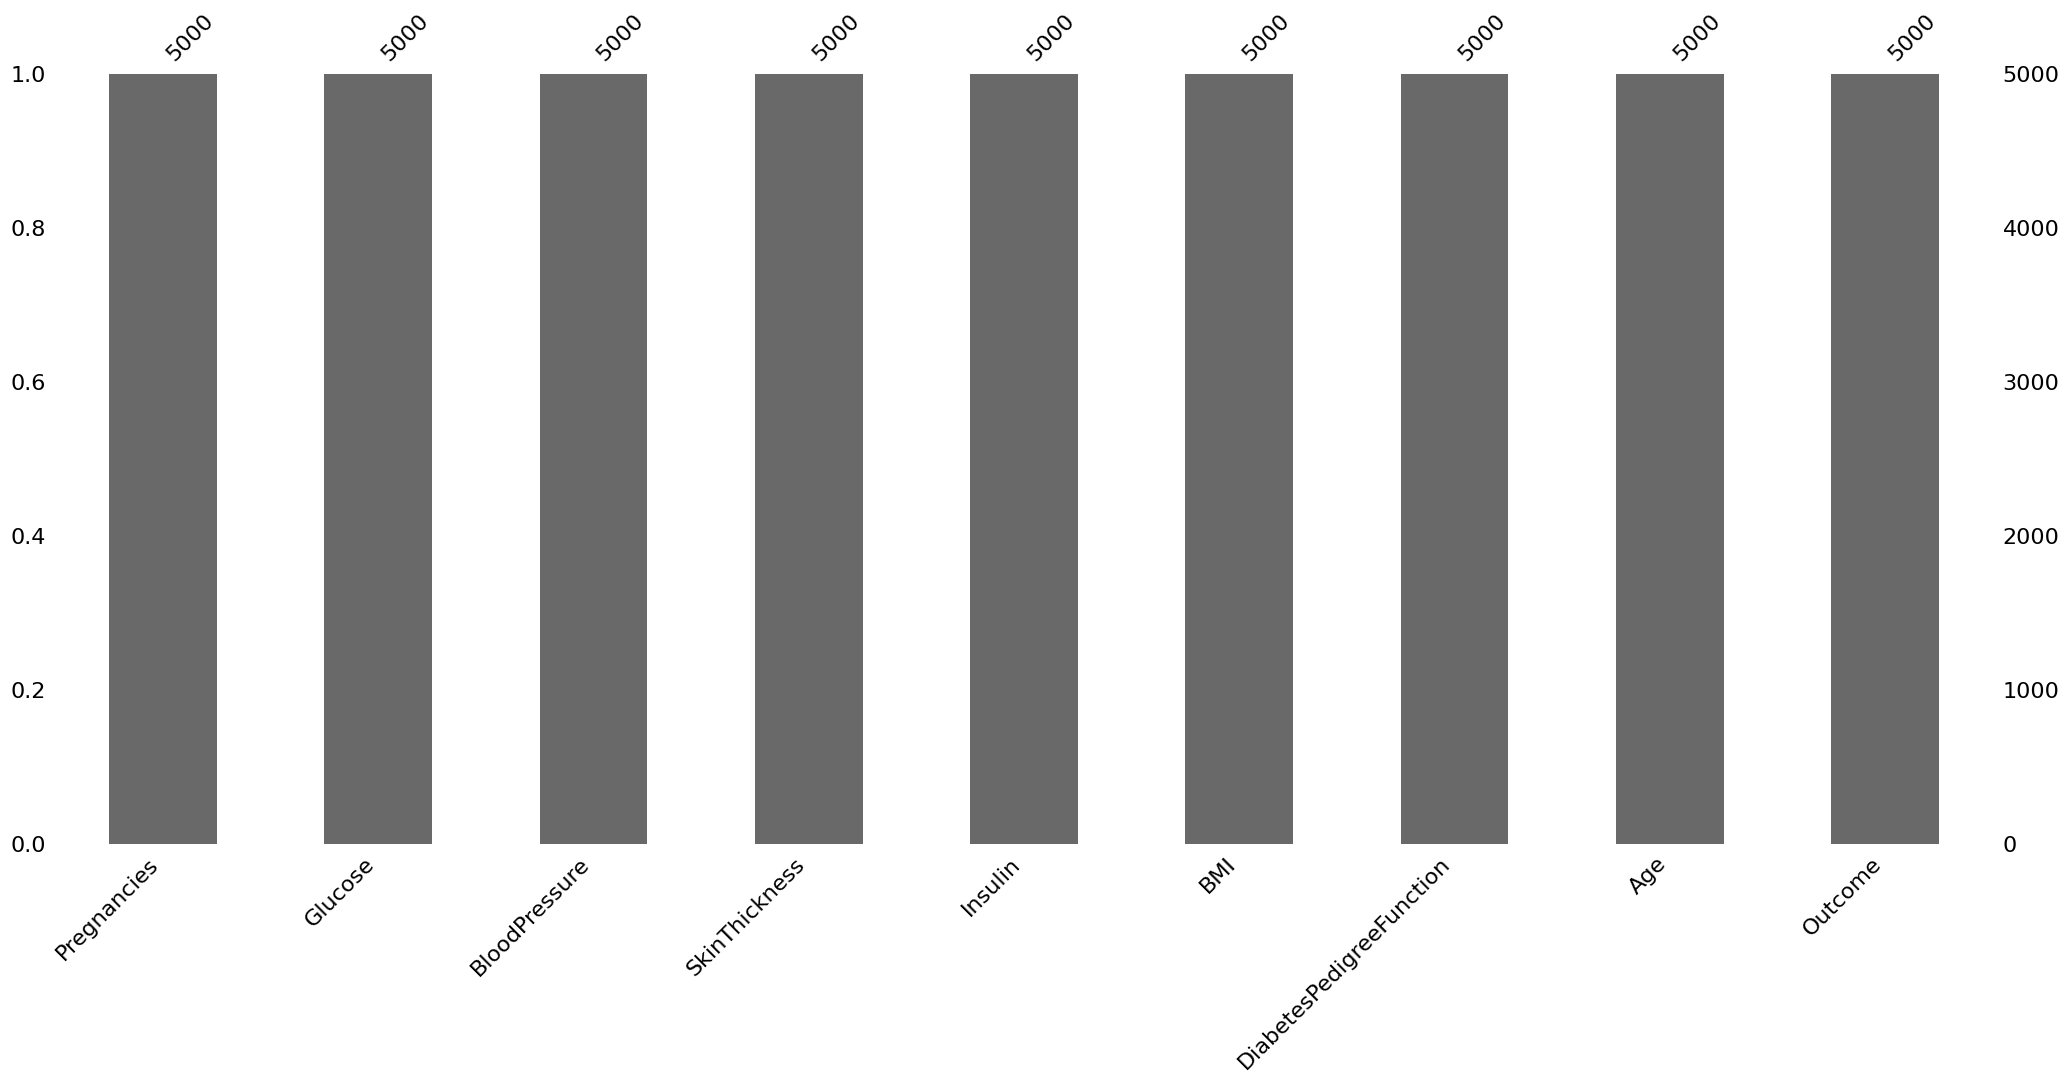

In [18]:
#Plotting Null Count Analysis Plot
p = msno.bar(df)
plt.show()

Outcome
1    3278
0    1722
Name: count, dtype: int64


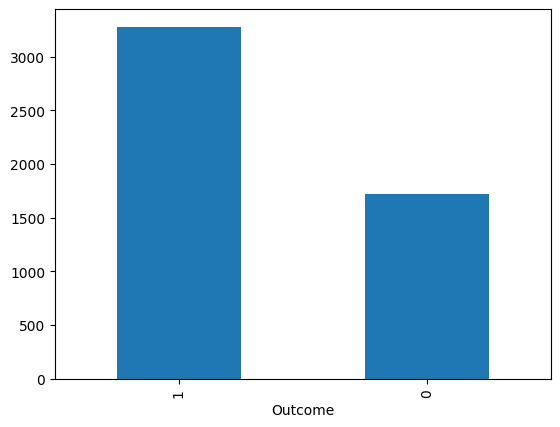

In [19]:
#Now, check that how well our outcome column is balanced

color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = diabetes_df["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(df.Outcome.value_counts())
p=df.Outcome.value_counts().plot(kind="bar")
plt.show()

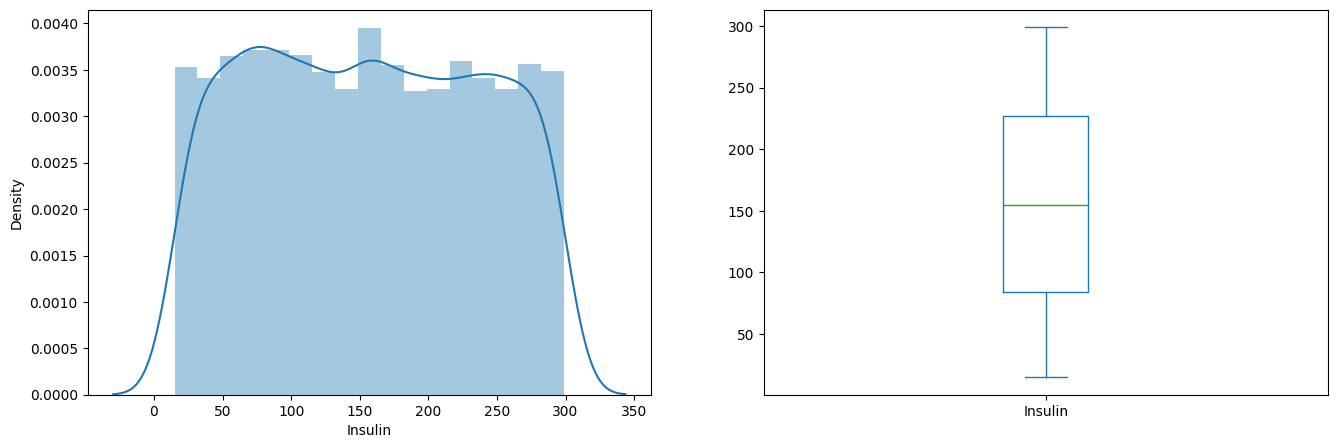

In [20]:

plt.subplot(121), sns.distplot(df['Insulin'])
plt.subplot(122), df['Insulin'].plot.box(figsize=(16,5))
plt.show()

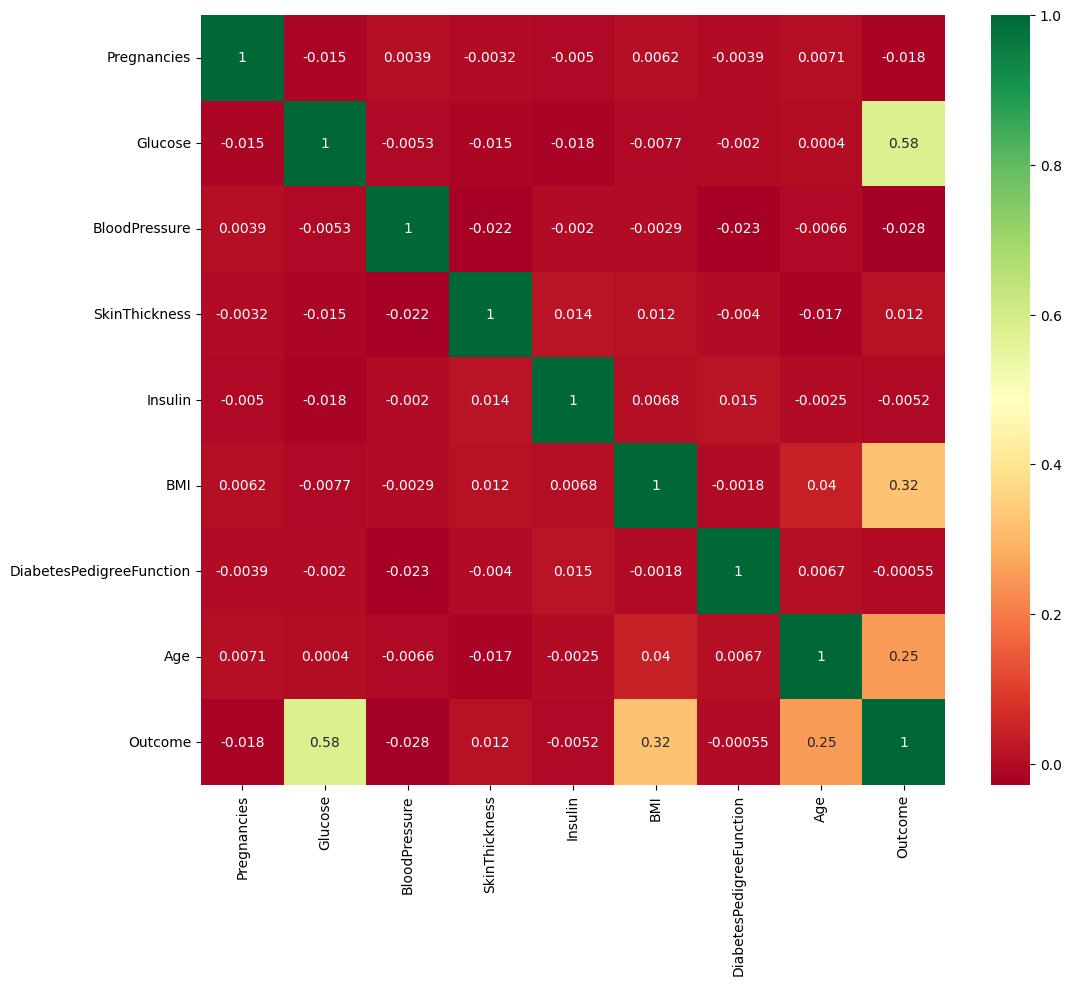

In [21]:
# seaborn has an easy method to showcase heatmap
plt.figure(figsize=(12,10))
p = sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')
plt.show()

In [22]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,116,81,17,160,16.1,0.693,74,0
1,3,174,48,31,247,16.0,1.174,45,1
2,12,193,64,48,248,36.0,0.702,53,1
3,14,82,128,39,228,42.9,1.113,40,0
4,10,169,41,17,75,41.3,0.604,78,1


In [23]:
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(diabetes_df.drop(["Outcome"],axis = 1),), columns=['Pregnancies',
'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.215744,-0.521854,-0.147865,-0.935166,0.051849,-1.617963,-0.850830,1.401945
1,-0.905463,1.034174,-1.413434,-0.063623,1.114275,-1.627826,-0.172107,-0.202896
2,1.163694,1.543907,-0.799824,0.994680,1.126487,0.344797,-0.838131,0.239819
3,1.623506,-1.434009,1.654613,0.434402,0.882251,1.025352,-0.258183,-0.479593
4,0.703881,0.900034,-1.681888,-0.935166,-0.986154,0.867542,-0.976415,1.623302


In [24]:
#Splitting the dataset
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25,random_state=42)

In [26]:
# from imblearn.over_sampling import SMOTE

# smote = SMOTE(random_state=42)

# X_train, y_train = smote.fit_resample(X_train, y_train)

# from collections import Counter
# print(Counter(y_train))

# First- Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [29]:
rfc_train = rfc.predict(X_train)

print("Accuracy_Score =", format(metrics.accuracy_score(y_train, rfc_train)))

Accuracy_Score = 1.0


In [30]:
predictions = rfc.predict(X_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

Accuracy_Score = 1.0


In [31]:
report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       450
           1       1.00      1.00      1.00       800

    accuracy                           1.00      1250
   macro avg       1.00      1.00      1.00      1250
weighted avg       1.00      1.00      1.00      1250



# Second- Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [34]:
dt_pred = dtree.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,dt_pred)))

Accuracy Score = 1.0


In [35]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,dt_pred))

[[450   0]
 [  0 800]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       450
           1       1.00      1.00      1.00       800

    accuracy                           1.00      1250
   macro avg       1.00      1.00      1.00      1250
weighted avg       1.00      1.00      1.00      1250



# Third- XgBoost classifier

In [36]:
from xgboost import XGBClassifier

In [37]:
xgb_model = XGBClassifier(gamma=0)
xgb_model.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [38]:
xgb_pred = xgb_model.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test, xgb_pred)))

Accuracy Score = 1.0


In [39]:
report = classification_report(y_test, xgb_pred)

In [40]:
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       450
           1       1.00      1.00      1.00       800

    accuracy                           1.00      1250
   macro avg       1.00      1.00      1.00      1250
weighted avg       1.00      1.00      1.00      1250



# Fourth-Support Vector Machine (SVM)

In [41]:
from sklearn.svm import SVC

In [42]:
svc_model = SVC()
svc_model.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [43]:
svc_pred = svc_model.predict(X_test)

In [44]:
print("Accuracy Score =", format(metrics.accuracy_score(y_test, svc_pred)))

Accuracy Score = 0.8896


In [45]:
print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test,svc_pred))

[[381  69]
 [ 69 731]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       450
           1       0.91      0.91      0.91       800

    accuracy                           0.89      1250
   macro avg       0.88      0.88      0.88      1250
weighted avg       0.89      0.89      0.89      1250



In [46]:
rfc.feature_importances_

array([0.00785705, 0.52435907, 0.01270267, 0.01123226, 0.01334553,
       0.23332907, 0.01440509, 0.18276927])

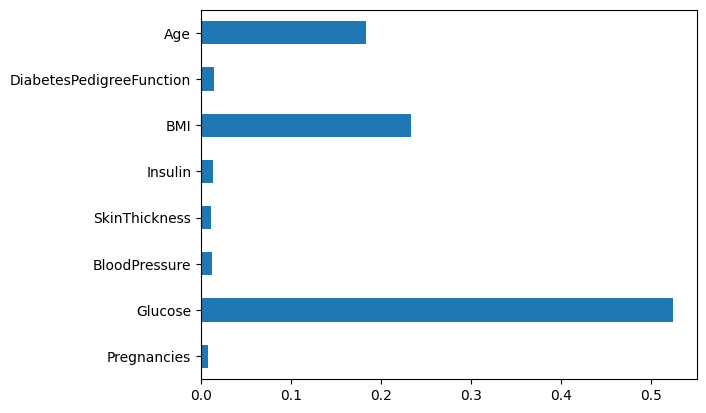

In [47]:
# Plotting feature importances
(pd.Series(rfc.feature_importances_, index=X.columns).plot(kind='barh'))
plt.show()

## Fifth Adaboost Algorithm

In [48]:
from sklearn.ensemble import AdaBoostClassifier

base_model = DecisionTreeClassifier(max_depth=1)

ada_model = AdaBoostClassifier(
    estimator=base_model,
    n_estimators=100,
    learning_rate=0.5,
    random_state=42
)

ada_model.fit(X_train, y_train)

,estimator,DecisionTreeC...r(max_depth=1)
,n_estimators,100
,learning_rate,0.5
,algorithm,'deprecated'
,random_state,42
,criterion,'gini'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0


In [49]:
ada_pred = ada_model.predict(X_test)

In [50]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, ada_pred))
print("\nClassification Report:\n", classification_report(y_test, ada_pred))


Confusion Matrix:
 [[450   0]
 [  0 800]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       450
           1       1.00      1.00      1.00       800

    accuracy                           1.00      1250
   macro avg       1.00      1.00      1.00      1250
weighted avg       1.00      1.00      1.00      1250



In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(5,4))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=["Non-Diabetic", "Diabetic"],
        yticklabels=["Non-Diabetic", "Diabetic"]
    )
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

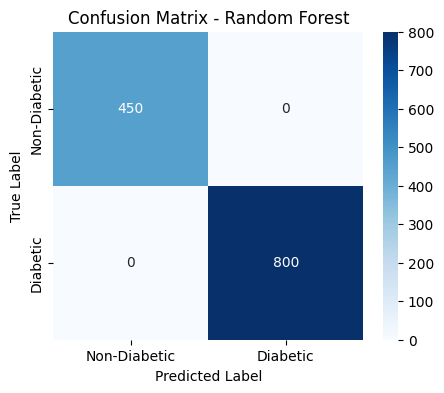

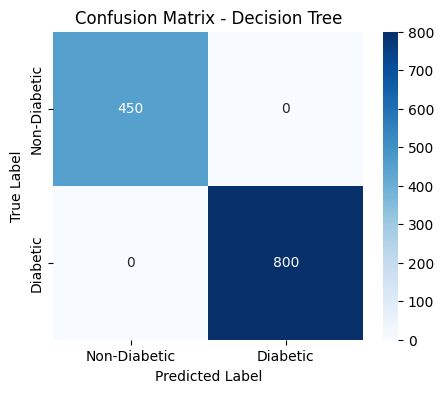

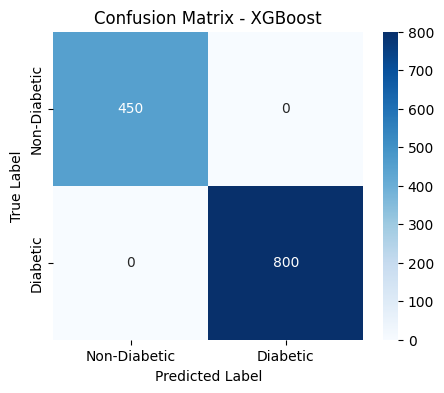

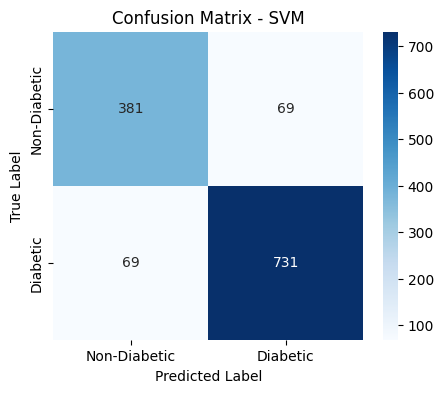

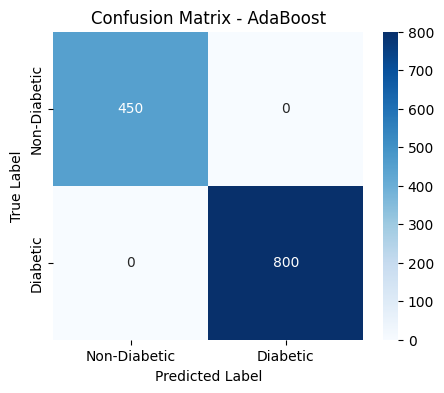

In [52]:
plot_confusion_matrix(y_test, predictions,"Random Forest")
plot_confusion_matrix(y_test, dt_pred, "Decision Tree")
plot_confusion_matrix(y_test, xgb_pred, "XGBoost")
plot_confusion_matrix(y_test, svc_pred, "SVM")
plot_confusion_matrix(y_test, ada_pred, "AdaBoost")

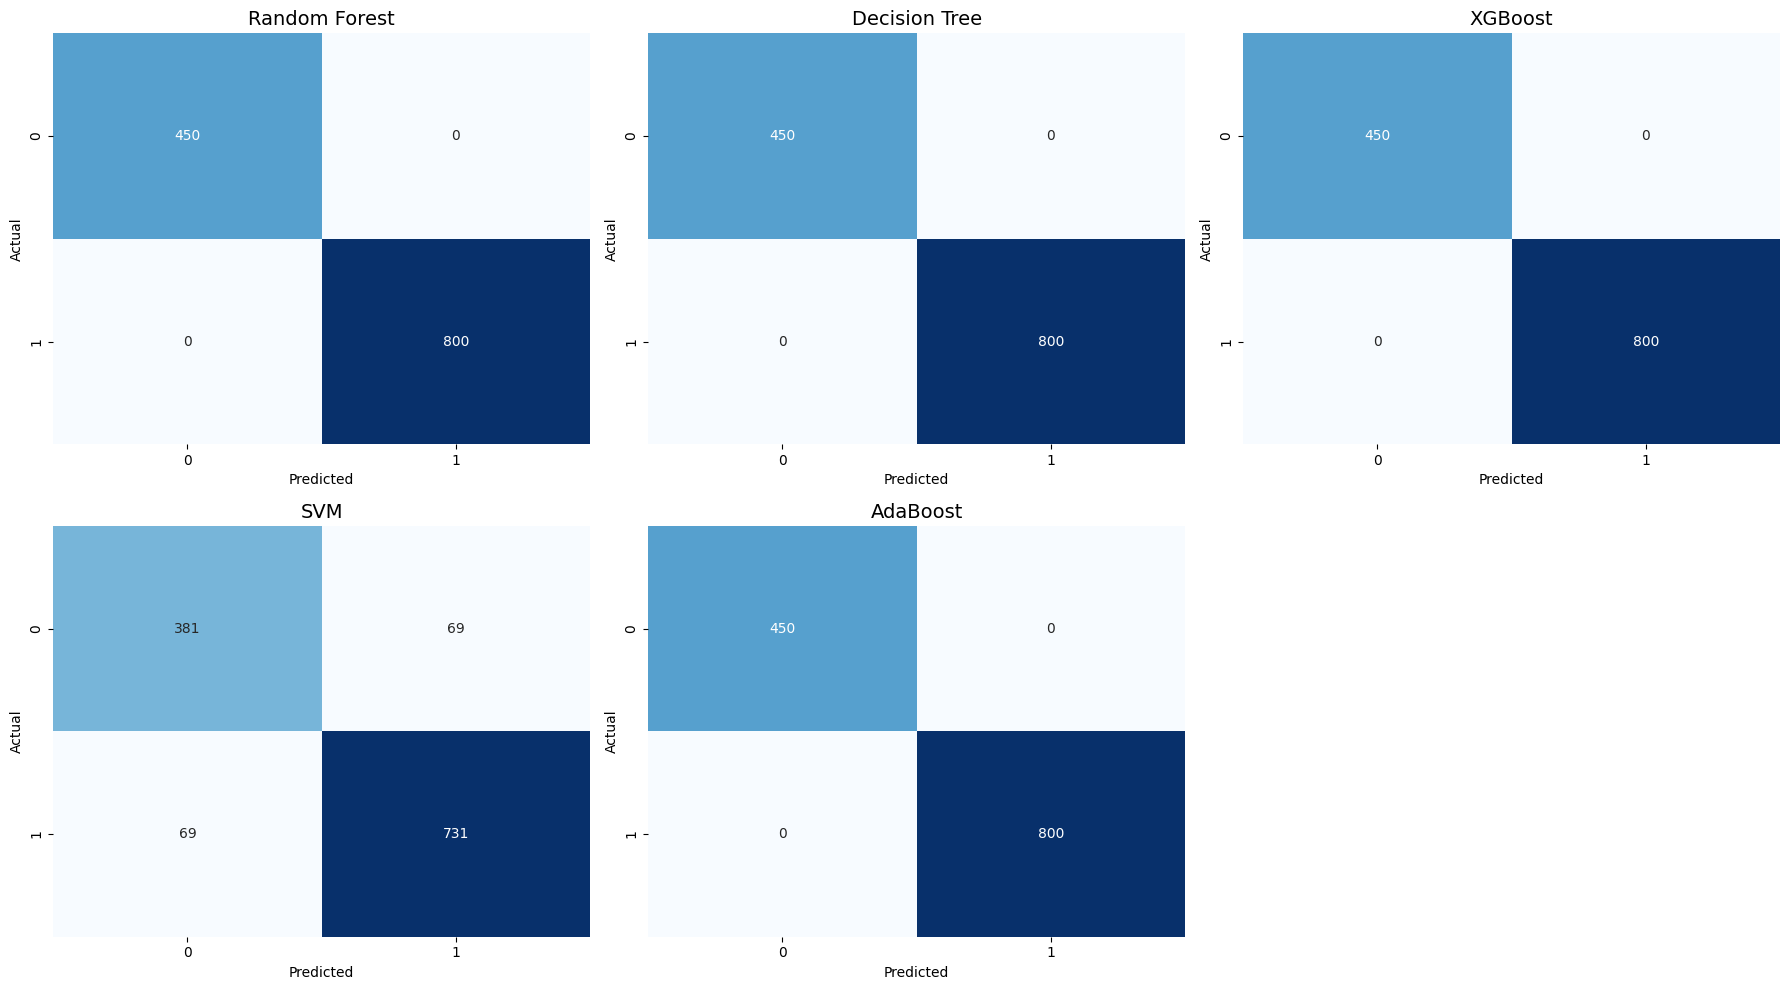

In [53]:
def plot_all_confusion_matrices(y_test, preds_dict):
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    axes = axes.flatten()

    for idx, (model_name, y_pred) in enumerate(preds_dict.items()):
        cm = confusion_matrix(y_test, y_pred)

        sns.heatmap(
            cm,
            annot=True,
            fmt='d',
            cmap='Blues',
            ax=axes[idx],
            cbar=False
        )

        axes[idx].set_title(model_name, fontsize=14)
        axes[idx].set_xlabel("Predicted")
        axes[idx].set_ylabel("Actual")

    # Remove empty subplot (if any)
    for j in range(idx + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


predictions_dict = {
    "Random Forest": predictions,
    "Decision Tree": dt_pred,
    "XGBoost": xgb_pred,
    "SVM": svc_pred,
    "AdaBoost": ada_pred
}

plot_all_confusion_matrices(y_test, predictions_dict)

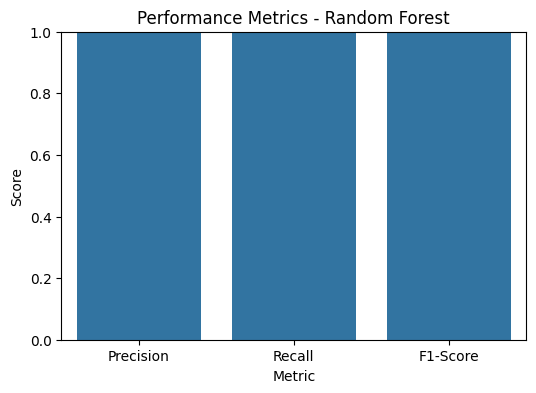

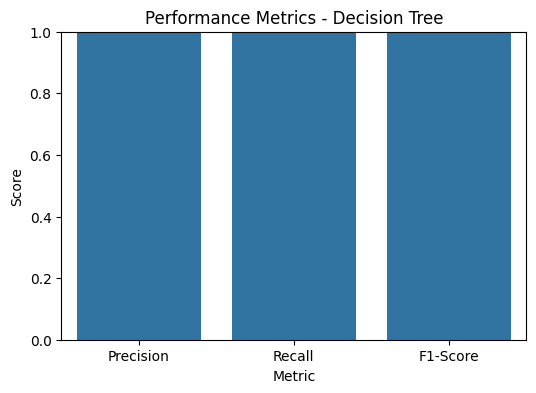

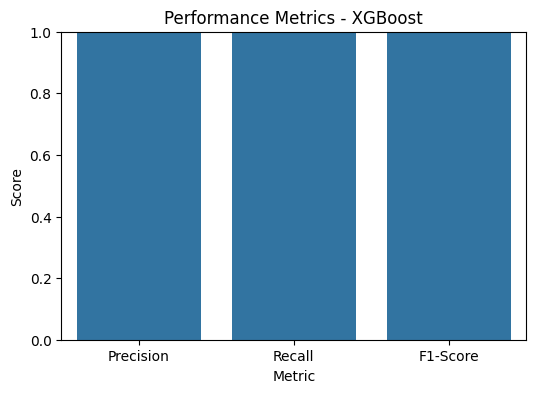

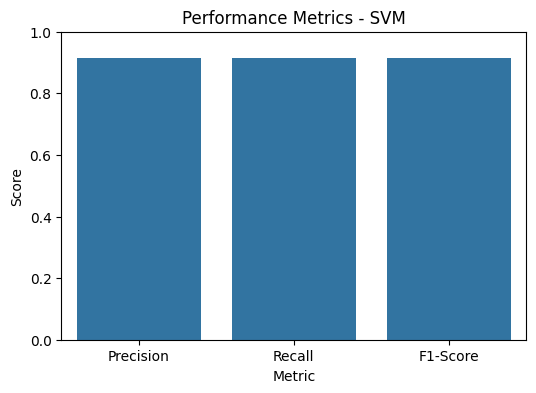

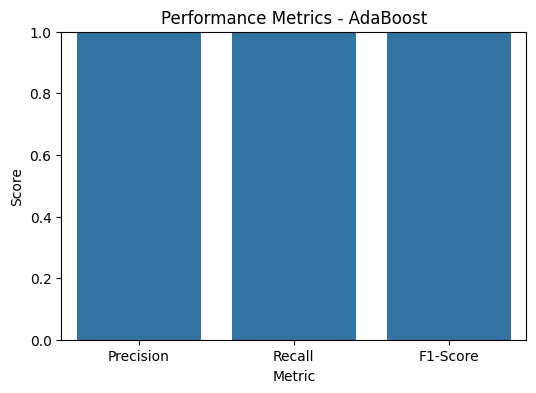

In [54]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score

def plot_metrics(y_test, y_pred, model_name):
    metrics = {
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred)
    }

    df = pd.DataFrame(metrics, index=[model_name]).T

    plt.figure(figsize=(6,4))
    sns.barplot(x=df.index, y=df[model_name])
    plt.ylim(0, 1)
    plt.title(f"Performance Metrics - {model_name}")
    plt.ylabel("Score")
    plt.xlabel("Metric")
    plt.show()

plot_metrics(y_test, predictions, "Random Forest")
plot_metrics(y_test, dt_pred, "Decision Tree")
plot_metrics(y_test, xgb_pred, "XGBoost")
plot_metrics(y_test, svc_pred, "SVM")
plot_metrics(y_test, ada_pred, "AdaBoost")

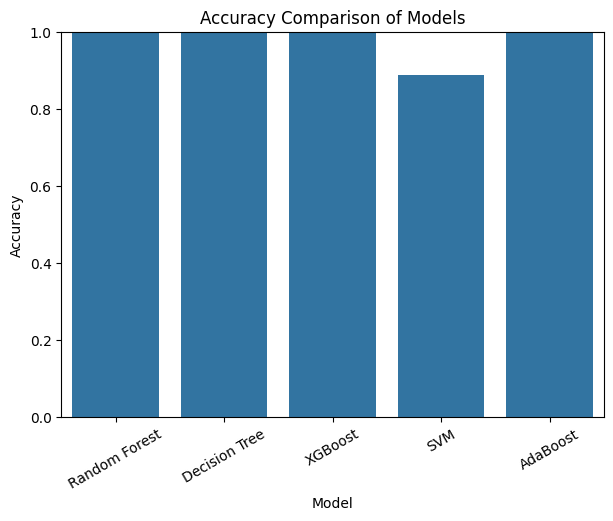

In [55]:
from sklearn.metrics import accuracy_score

accuracy_data = {
    "Random Forest": accuracy_score(y_test, predictions),
    "Decision Tree": accuracy_score(y_test, dt_pred),
    "XGBoost": accuracy_score(y_test, xgb_pred),
    "SVM": accuracy_score(y_test, svc_pred),
    "AdaBoost": accuracy_score(y_test, ada_pred)
}

acc_df = pd.DataFrame.from_dict(accuracy_data, orient="index", columns=["Accuracy"])

plt.figure(figsize=(7,5))
sns.barplot(x=acc_df.index, y="Accuracy", data=acc_df)
plt.ylim(0, 1)
plt.title("Accuracy Comparison of Models")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.xticks(rotation=30)
plt.show()

# Saving Model – Random Forest

In [56]:
import pickle

In [57]:
# Firstly we will be using the dump() function to save the model using pickle
saved_model = pickle.dumps(rfc)

In [58]:
# Then we will be loading that saved model
rfc_from_pickle = pickle.loads(saved_model)

In [59]:
# lastly, after loading that model we will use this to make predictions
rfc_from_pickle.predict(X_test)

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [60]:
rfc.predict([[0,137,40,35,168,43.1,2.228,33]]) #4th patient

array([0], dtype=int64)

In [61]:
rfc.predict([[10,101,76,48,180,32.9,0.171,63]])  # 763 th patient

array([1], dtype=int64)